<a href="https://colab.research.google.com/github/tjallard/Covid/blob/main/COVID19_NC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries, data, and Google Functions

In [1]:
# Import Libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import io
import matplotlib as mpl
import seaborn as sns

# It is a function that renders the figure in a notebook (instead of displaying a dump of the figure object).
%matplotlib inline

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

In [2]:
# Adds functionality for accessing file on Google Drive
#https://pypi.org/project/PyDrive/
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
# Authenticate users to have acces to google Drive.  Click the link to get the code. 
# A seperate Google Window will open in your browser to authenticate.  
# Copy code the very long code and paste it into the Colab. Hit enter.  

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
# This mounts your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load data from Google Drive
df = pd.read_csv('/content/drive/MyDrive/COVID_Study/COVID_Data/NC_Z4_19_20_2022May26.csv')

# Summary of the data

In [6]:
# Verify the data
df

,ZIP_CODE,ZIP4,20_CRRTTYPE,20_POP20,20_HH20,20_POPGROW20,20_AVGHHSIZE,20_MEDAGHHER,20_MEDRENT,20_MEDVALOCC,...,19_PCTBLPOP,19_PCTHISPOP,19_PCTWNHPOP,19_PCTGRADDEG,19_PCTWHCOL,19_PCTSPARC,19_CASH_EDU,19_HEALTHINS,MEDHHINC,MEDAGHHER
0,27006,1,B,96.1,37.6,3.44,2.56,55.1,833,273458,...,2.74,1.78,92.94,23.26,43.95,7.50,83.9,4165.7,112300,54.1
1,27006,121,B,58.0,22.7,3.44,2.56,55.1,833,273458,...,2.74,1.78,92.94,23.26,43.95,7.50,83.9,4165.7,112300,54.1
2,27006,201,B,81.2,31.7,3.44,2.56,55.1,833,273458,...,2.74,1.78,92.94,23.26,43.95,7.50,83.9,4165.7,112300,54.1
3,27006,316,B,77.9,30.4,3.44,2.56,55.1,833,273458,...,2.74,1.78,92.94,23.26,43.95,7.50,83.9,4165.7,112300,54.1
4,27006,476,B,77.9,30.4,3.44,2.56,55.1,833,273458,...,2.74,1.78,92.94,23.26,43.95,7.50,83.9,4165.7,112300,54.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563433,30559,2385,R,2.6,1.1,7.75,2.26,60.4,228,130226,...,0.96,1.86,94.22,9.67,20.30,5.66,30.7,3761.1,57335,60.1
1563434,30559,3096,R,2.3,1.0,13.13,2.36,59.7,293,165705,...,0.44,0.90,96.88,4.04,17.35,7.36,41.6,3826.5,55070,59.0
1563435,30559,9000,R,1.9,0.8,12.37,2.32,61.8,689,152497,...,0.73,2.94,94.61,8.24,21.25,5.23,34.6,3726.1,41924,60.8
1563436,30559,9200,R,1.9,0.8,12.37,2.32,61.8,689,152497,...,0.73,2.94,94.61,8.24,21.25,5.23,34.6,3726.1,41924,60.8


In [7]:
# Check shape of dataframe
df.shape

(1563438, 39)

In [8]:
# Add prefix 19_ to columns MEDHHINC, MEDAGHHER to keep naming consistent
df.rename(columns={"MEDHHINC":"19_MEDHHINC", "MEDAGHHER":"19_MEDAGHHER"}, inplace = True)

In [9]:
# Verify Rename
df.columns

Index(['ZIP_CODE', 'ZIP4', '20_CRRTTYPE', '20_POP20', '20_HH20',
       '20_POPGROW20', '20_AVGHHSIZE', '20_MEDAGHHER', '20_MEDRENT',
       '20_MEDVALOCC', '20_MEDVEHICLE', '20_MEDHHINC', '20_AVGHHINC',
       '20_PERCAPINC', '20_MEDAGE', '20_PCTHH200P', '20_HHHINCAVG',
       'Right_ZIP_CODE', 'Right_ZIP4', 'STAABBRV', 'LAT', 'LONG', '19_POP19',
       '19_HH19', '19_POPGROW19', '19_MEDVEHICLE', '19_MEDAGE', '19_PCTOOHH',
       '19_PCTWHPOP', '19_PCTBLPOP', '19_PCTHISPOP', '19_PCTWNHPOP',
       '19_PCTGRADDEG', '19_PCTWHCOL', '19_PCTSPARC', '19_CASH_EDU',
       '19_HEALTHINS', '19_MEDHHINC', '19_MEDAGHHER'],
      dtype='object')

In [10]:
# Verify that the columns 'ZIP_CODE' and 'Right_ZIP_CODE' are equal
df['ZIP_CODE'].equals(df['Right_ZIP_CODE']) 

True

In [11]:
# Verify that the columns 'ZIP4' and 'Right_ZIP4' are equal
df['ZIP4'].equals(df['Right_ZIP4']) 

True

In [12]:
# Drop Columns that are redundant or not needed 
df.drop(['Right_ZIP_CODE', 'Right_ZIP4', 'STAABBRV', 'LAT', 'LONG', '20_CRRTTYPE'], axis=1, inplace=True);

In [13]:
# Verify dropped columns
df.shape

(1563438, 33)

In [14]:
# Check data types
df.dtypes

ZIP_CODE           int64
ZIP4               int64
20_POP20         float64
20_HH20          float64
20_POPGROW20     float64
20_AVGHHSIZE     float64
20_MEDAGHHER     float64
20_MEDRENT         int64
20_MEDVALOCC       int64
20_MEDVEHICLE    float64
20_MEDHHINC        int64
20_AVGHHINC        int64
20_PERCAPINC       int64
20_MEDAGE        float64
20_PCTHH200P     float64
20_HHHINCAVG       int64
19_POP19         float64
19_HH19          float64
19_POPGROW19     float64
19_MEDVEHICLE    float64
19_MEDAGE        float64
19_PCTOOHH       float64
19_PCTWHPOP      float64
19_PCTBLPOP      float64
19_PCTHISPOP     float64
19_PCTWNHPOP     float64
19_PCTGRADDEG    float64
19_PCTWHCOL      float64
19_PCTSPARC      float64
19_CASH_EDU      float64
19_HEALTHINS     float64
19_MEDHHINC        int64
19_MEDAGHHER     float64
dtype: object

# NULLS and Missing Values Treatment

In [15]:
# Verify Number of entries
len(df)

1563438

In [16]:
#Drop any 19_POP19 row that has a 0 population
df = df[df['19_POP19'] != 0]

In [17]:
# Verify '19_POP19' dropped values
len(df)

1524026

In [18]:
#Drop any '20_POP20' row that has a 0 population
df = df[df['20_POP20'] != 0]

In [19]:
# Verify '20_POP20' dropped values
len(df)

1523845

In [20]:
# Rows before dropping zeros and rows after dropping zeros (better way to do this?)
# Total Rows before droping zeros = 1563438
# After dropping 2019 zeros = 1524026/1563438
# After dropping 2020 zeros = 1523845/1563438
lostrows = (1523845/1563438) * 100 - 100
lostrows

-2.5324317305834967

In [21]:
# Lost rows from zeros in 2019
lostrows2019 = (1524026/1563438) * 100 - 100
lostrows2019

-2.520854680518198

In [22]:
# Lost rows from zeros in 2020
lostrows2020 = (1523845/1563438) * 100 - 100
lostrows2020

-2.5324317305834967

In [23]:
# Check for any Null missing values
df.isnull().sum().sum()

0

In [24]:
# Check location of Null missing values
df.isnull().any()

ZIP_CODE         False
ZIP4             False
20_POP20         False
20_HH20          False
20_POPGROW20     False
20_AVGHHSIZE     False
20_MEDAGHHER     False
20_MEDRENT       False
20_MEDVALOCC     False
20_MEDVEHICLE    False
20_MEDHHINC      False
20_AVGHHINC      False
20_PERCAPINC     False
20_MEDAGE        False
20_PCTHH200P     False
20_HHHINCAVG     False
19_POP19         False
19_HH19          False
19_POPGROW19     False
19_MEDVEHICLE    False
19_MEDAGE        False
19_PCTOOHH       False
19_PCTWHPOP      False
19_PCTBLPOP      False
19_PCTHISPOP     False
19_PCTWNHPOP     False
19_PCTGRADDEG    False
19_PCTWHCOL      False
19_PCTSPARC      False
19_CASH_EDU      False
19_HEALTHINS     False
19_MEDHHINC      False
19_MEDAGHHER     False
dtype: bool

In [25]:
# Check rows for objects with the value of 'NaN'
df.eq('NaN', axis=0).sum().sum()

0

In [26]:
# Check rows for objects with the value of 'nan'
df.eq('nan', axis=0).sum().sum()

0

In [27]:
# Check rows for opbjects with the value of 'NA'
df.eq('n/a', axis=0).sum().sum()

0

# Create Dependent Variable

In [28]:
# Create Dependent Variable (DV) - Difference between Median Houshold Income from 2019 to 2020 as a percentage
# Finding the Dependent Variable (DV): Overview (2020-2019)/2019

df['MEDHHINC_DIFF_RAW'] = df['20_MEDHHINC'] - df['19_MEDHHINC']
df['MEDHHINC_DIFF_PCT'] = df['MEDHHINC_DIFF_RAW']/df['19_MEDHHINC']
df['MEDHHINC_DIFF_PCT']

0          0.002956
1          0.002956
2          0.002956
3          0.002956
4          0.002956
             ...   
1563433    0.014197
1563434    0.011277
1563435    0.007609
1563436    0.007609
1563437    0.007609
Name: MEDHHINC_DIFF_PCT, Length: 1523845, dtype: float64

In [29]:
# Check for infinity values in the DV
count = np.isinf(df['MEDHHINC_DIFF_PCT']).values.sum()
count

129

In [30]:
# Convert infinity values to NULL Values 
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [31]:
# Check for nulls in the DV
df.isnull().sum()

ZIP_CODE               0
ZIP4                   0
20_POP20               0
20_HH20                0
20_POPGROW20           0
20_AVGHHSIZE           0
20_MEDAGHHER           0
20_MEDRENT             0
20_MEDVALOCC           0
20_MEDVEHICLE          0
20_MEDHHINC            0
20_AVGHHINC            0
20_PERCAPINC           0
20_MEDAGE              0
20_PCTHH200P           0
20_HHHINCAVG           0
19_POP19               0
19_HH19                0
19_POPGROW19           0
19_MEDVEHICLE          0
19_MEDAGE              0
19_PCTOOHH             0
19_PCTWHPOP            0
19_PCTBLPOP            0
19_PCTHISPOP           0
19_PCTWNHPOP           0
19_PCTGRADDEG          0
19_PCTWHCOL            0
19_PCTSPARC            0
19_CASH_EDU            0
19_HEALTHINS           0
19_MEDHHINC            0
19_MEDAGHHER           0
MEDHHINC_DIFF_RAW      0
MEDHHINC_DIFF_PCT    954
dtype: int64

In [32]:
# Drop Nulls in the DV
df.dropna(axis = 0, how = 'any', inplace=True)

In [33]:
# Verify nulls were dropped
df.isnull().sum().sum()

0

# Transforming with Zip Codes

In [35]:
# Verify column data types
df.dtypes

ZIP_CODE               int64
ZIP4                   int64
20_POP20             float64
20_HH20              float64
20_POPGROW20         float64
20_AVGHHSIZE         float64
20_MEDAGHHER         float64
20_MEDRENT             int64
20_MEDVALOCC           int64
20_MEDVEHICLE        float64
20_MEDHHINC            int64
20_AVGHHINC            int64
20_PERCAPINC           int64
20_MEDAGE            float64
20_PCTHH200P         float64
20_HHHINCAVG           int64
19_POP19             float64
19_HH19              float64
19_POPGROW19         float64
19_MEDVEHICLE        float64
19_MEDAGE            float64
19_PCTOOHH           float64
19_PCTWHPOP          float64
19_PCTBLPOP          float64
19_PCTHISPOP         float64
19_PCTWNHPOP         float64
19_PCTGRADDEG        float64
19_PCTWHCOL          float64
19_PCTSPARC          float64
19_CASH_EDU          float64
19_HEALTHINS         float64
19_MEDHHINC            int64
19_MEDAGHHER         float64
MEDHHINC_DIFF_RAW      int64
MEDHHINC_DIFF_

In [36]:
# Convert 'ZIP_CODE' and 'ZIP4' from int64 to string
df['ZIP_CODE'] = df['ZIP_CODE'].astype(str)
df['ZIP4'] = df['ZIP4'].astype(str)

In [37]:
# Have all variables in ZIP_CODE have 5 numbers (insert zeros where needed)
df['ZIP_CODE'] = df.ZIP_CODE.str.pad(5,side='left', fillchar = '0')

In [38]:
# Have all variables in ZIP4 have 4 numbers (insert zeros where needed)
df['ZIP4'] = df.ZIP4.str.pad(4,side='left', fillchar = '0')
df

,ZIP_CODE,ZIP4,20_POP20,20_HH20,20_POPGROW20,20_AVGHHSIZE,20_MEDAGHHER,20_MEDRENT,20_MEDVALOCC,20_MEDVEHICLE,...,19_PCTWNHPOP,19_PCTGRADDEG,19_PCTWHCOL,19_PCTSPARC,19_CASH_EDU,19_HEALTHINS,19_MEDHHINC,19_MEDAGHHER,MEDHHINC_DIFF_RAW,MEDHHINC_DIFF_PCT
0,27006,0001,96.1,37.6,3.44,2.56,55.1,833,273458,2.6,...,92.94,23.26,43.95,7.50,83.9,4165.7,112300,54.1,332,0.002956
1,27006,0121,58.0,22.7,3.44,2.56,55.1,833,273458,2.6,...,92.94,23.26,43.95,7.50,83.9,4165.7,112300,54.1,332,0.002956
2,27006,0201,81.2,31.7,3.44,2.56,55.1,833,273458,2.6,...,92.94,23.26,43.95,7.50,83.9,4165.7,112300,54.1,332,0.002956
3,27006,0316,77.9,30.4,3.44,2.56,55.1,833,273458,2.6,...,92.94,23.26,43.95,7.50,83.9,4165.7,112300,54.1,332,0.002956
4,27006,0476,77.9,30.4,3.44,2.56,55.1,833,273458,2.6,...,92.94,23.26,43.95,7.50,83.9,4165.7,112300,54.1,332,0.002956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563433,30559,2385,2.6,1.1,7.75,2.26,60.4,228,130226,2.4,...,94.22,9.67,20.30,5.66,30.7,3761.1,57335,60.1,814,0.014197
1563434,30559,3096,2.3,1.0,13.13,2.36,59.7,293,165705,2.6,...,96.88,4.04,17.35,7.36,41.6,3826.5,55070,59.0,621,0.011277
1563435,30559,9000,1.9,0.8,12.37,2.32,61.8,689,152497,2.5,...,94.61,8.24,21.25,5.23,34.6,3726.1,41924,60.8,319,0.007609
1563436,30559,9200,1.9,0.8,12.37,2.32,61.8,689,152497,2.5,...,94.61,8.24,21.25,5.23,34.6,3726.1,41924,60.8,319,0.007609


In [39]:
# Concatenate 'ZIP_CODE' and 'ZIP_4' into column named 'FULL_ZIP'
df['FULL_ZIP'] = df['ZIP_CODE'] + df['ZIP4']
df.dtypes

ZIP_CODE              object
ZIP4                  object
20_POP20             float64
20_HH20              float64
20_POPGROW20         float64
20_AVGHHSIZE         float64
20_MEDAGHHER         float64
20_MEDRENT             int64
20_MEDVALOCC           int64
20_MEDVEHICLE        float64
20_MEDHHINC            int64
20_AVGHHINC            int64
20_PERCAPINC           int64
20_MEDAGE            float64
20_PCTHH200P         float64
20_HHHINCAVG           int64
19_POP19             float64
19_HH19              float64
19_POPGROW19         float64
19_MEDVEHICLE        float64
19_MEDAGE            float64
19_PCTOOHH           float64
19_PCTWHPOP          float64
19_PCTBLPOP          float64
19_PCTHISPOP         float64
19_PCTWNHPOP         float64
19_PCTGRADDEG        float64
19_PCTWHCOL          float64
19_PCTSPARC          float64
19_CASH_EDU          float64
19_HEALTHINS         float64
19_MEDHHINC            int64
19_MEDAGHHER         float64
MEDHHINC_DIFF_RAW      int64
MEDHHINC_DIFF_

# EDA - Exploratory Data Analysis

In [40]:
# Descriptive Statistics with all nulls and zeros removed. Removed scientific notation to 2 decimal points.
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,20_POP20,20_HH20,20_POPGROW20,20_AVGHHSIZE,20_MEDAGHHER,20_MEDRENT,20_MEDVALOCC,20_MEDVEHICLE,20_MEDHHINC,20_AVGHHINC,...,19_PCTWNHPOP,19_PCTGRADDEG,19_PCTWHCOL,19_PCTSPARC,19_CASH_EDU,19_HEALTHINS,19_MEDHHINC,19_MEDAGHHER,MEDHHINC_DIFF_RAW,MEDHHINC_DIFF_PCT
count,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,...,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00
mean,6.84,2.72,9.32,2.43,52.60,605.10,163693.97,2.28,65300.51,80908.73,...,63.51,8.62,29.89,12.00,37.23,3394.28,64937.32,51.83,363.18,0.01
std,7.86,2.30,10.67,0.31,6.54,263.29,96937.39,0.33,29192.95,35207.34,...,25.60,8.51,11.91,5.95,22.85,492.45,29012.73,6.41,1903.76,0.03
min,0.10,0.00,-50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1617.10,11625.00,16.00,-122071.00,-1.00
25%,3.30,1.40,0.55,2.26,49.90,424.00,99796.00,2.10,46355.00,59262.00,...,46.97,2.78,21.46,8.05,23.80,3091.20,46134.00,49.20,71.00,0.00
50%,5.60,2.20,8.46,2.44,53.80,566.00,139519.00,2.30,59936.00,72981.00,...,69.33,6.02,27.68,11.00,32.90,3480.50,59563.00,52.90,362.00,0.01
75%,8.70,3.50,18.97,2.61,56.60,734.00,197582.00,2.50,76976.00,93013.00,...,84.90,11.77,36.88,14.82,43.40,3740.10,76637.00,55.80,635.00,0.01
max,5679.00,155.40,42.10,5.35,85.10,2184.00,1174799.00,3.20,346088.00,517611.00,...,100.00,60.61,71.80,65.86,247.30,4822.80,347011.00,84.60,147734.00,3.21


In [41]:
# Explore coorelations with Pearson standard correlation coefficient.
df.corr()

,20_POP20,20_HH20,20_POPGROW20,20_AVGHHSIZE,20_MEDAGHHER,20_MEDRENT,20_MEDVALOCC,20_MEDVEHICLE,20_MEDHHINC,20_AVGHHINC,...,19_PCTWNHPOP,19_PCTGRADDEG,19_PCTWHCOL,19_PCTSPARC,19_CASH_EDU,19_HEALTHINS,19_MEDHHINC,19_MEDAGHHER,MEDHHINC_DIFF_RAW,MEDHHINC_DIFF_PCT
20_POP20,1.000000,0.738973,0.167190,0.169656,-0.187598,0.201772,0.089439,0.019668,0.165027,0.134233,...,-0.040293,0.096882,0.176454,0.010358,0.118261,0.027659,0.164504,-0.186290,0.023587,0.008774
20_HH20,0.738973,1.000000,0.210609,0.080951,-0.223684,0.260592,0.137752,-0.011742,0.197737,0.167210,...,-0.023737,0.159461,0.268850,-0.024351,0.144299,0.034248,0.197344,-0.221707,0.024700,0.006994
20_POPGROW20,0.167190,0.210609,1.000000,0.114125,-0.365373,0.518829,0.416824,-0.028794,0.390353,0.359061,...,0.016047,0.335878,0.501895,-0.148928,0.334103,0.125074,0.389352,-0.360184,0.052197,0.022702
20_AVGHHSIZE,0.169656,0.080951,0.114125,1.000000,-0.115758,0.025020,-0.116879,0.348524,0.192831,0.105045,...,-0.188534,-0.201192,-0.043755,0.318061,0.123826,0.111282,0.190806,-0.119221,0.049124,0.027768
20_MEDAGHHER,-0.187598,-0.223684,-0.365373,-0.115758,1.000000,-0.280389,-0.046330,0.215168,-0.028874,0.013102,...,0.315167,-0.153928,-0.332436,-0.186650,0.040498,0.385700,-0.028730,0.995603,-0.004918,-0.006920
20_MEDRENT,0.201772,0.260592,0.518829,0.025020,-0.280389,1.000000,0.576288,0.060173,0.600090,0.580958,...,0.139665,0.535810,0.587258,-0.335576,0.546722,0.287004,0.599172,-0.271847,0.070796,0.016945
20_MEDVALOCC,0.089439,0.137752,0.416824,-0.116879,-0.046330,0.576288,1.000000,0.160196,0.727752,0.792234,...,0.400526,0.724475,0.610598,-0.551727,0.778046,0.517647,0.727817,-0.034633,0.067900,0.003939
20_MEDVEHICLE,0.019668,-0.011742,-0.028794,0.348524,0.215168,0.060173,0.160196,1.000000,0.419561,0.364705,...,0.526714,0.020018,0.181405,-0.423624,0.396581,0.672616,0.418531,0.218535,0.055416,0.013257
20_MEDHHINC,0.165027,0.197737,0.390353,0.192831,-0.028874,0.600090,0.727752,0.419561,1.000000,0.929933,...,0.402419,0.622205,0.708903,-0.533615,0.897542,0.691333,0.997880,-0.017862,0.126981,0.034230
20_AVGHHINC,0.134233,0.167210,0.359061,0.105045,0.013102,0.580958,0.792234,0.364705,0.929933,1.000000,...,0.415513,0.675332,0.684195,-0.554223,0.911433,0.675856,0.929264,0.024133,0.098230,0.013451


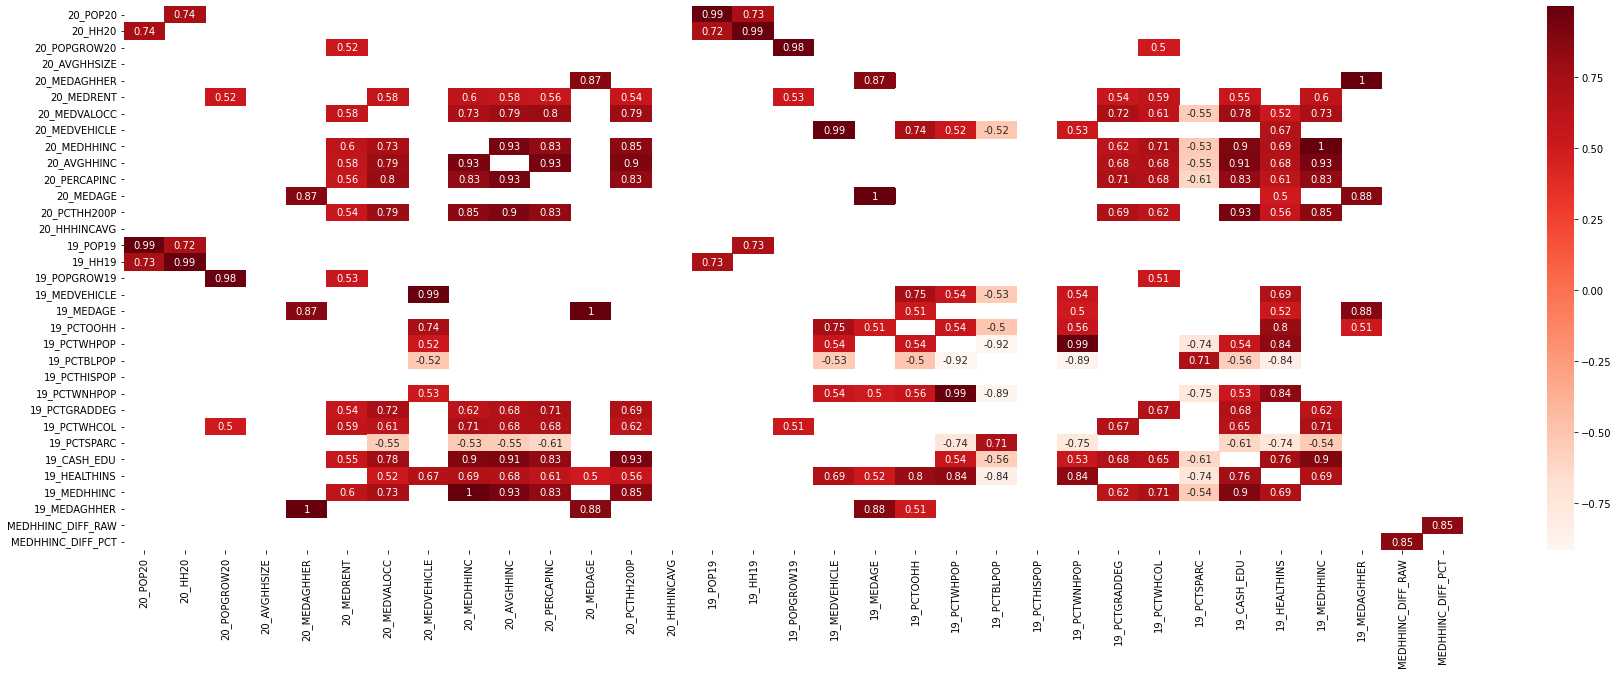

In [42]:
# Correlation
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

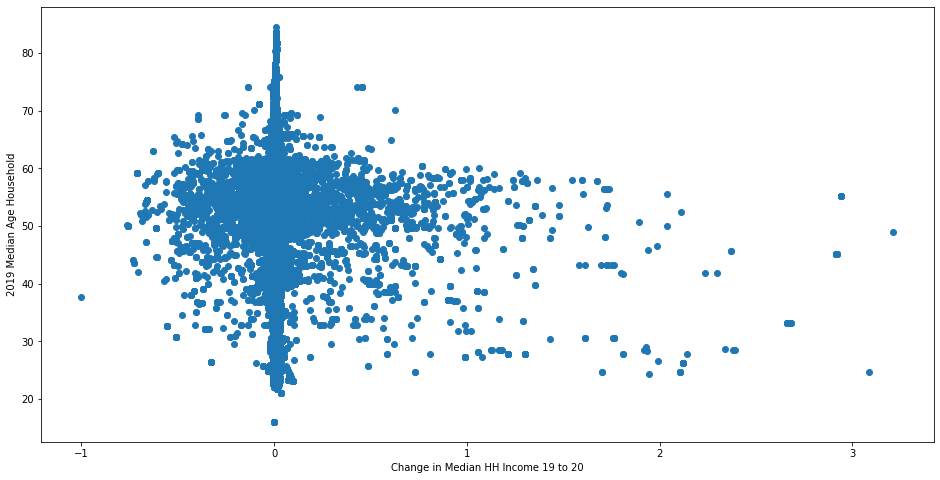

In [43]:
#Scatter Plot - Population Growth vs. Change in HH Income from 19 to 20
import matplotlib. pyplot as plt 
fig, ax = plt.subplots(figsize = (16, 8))
ax.scatter(df['MEDHHINC_DIFF_PCT'], df['19_MEDAGHHER'])
ax.set_xlabel('Change in Median HH Income 19 to 20')
ax.set_ylabel('2019 Median Age Household')
plt.show()

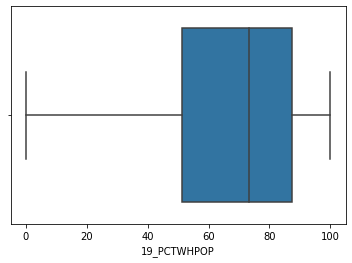

In [44]:
#Outliers - 2019 White People Population
sns.boxplot(x=df['19_PCTWHPOP'])
plt.show()

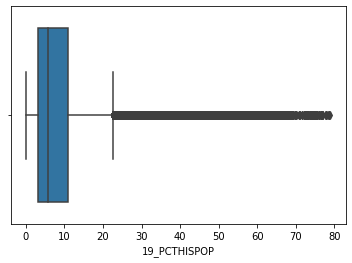

In [45]:
#Outliers - 2019 Hispanic People Population
sns.boxplot(x=df['19_PCTHISPOP'])
plt.show()

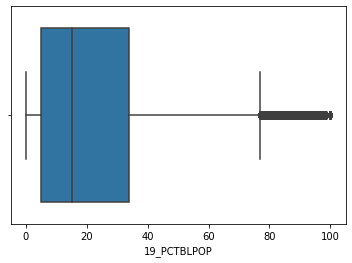

In [46]:
#Outliers - 2019 Black People Population
sns.boxplot(x=df['19_PCTBLPOP'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


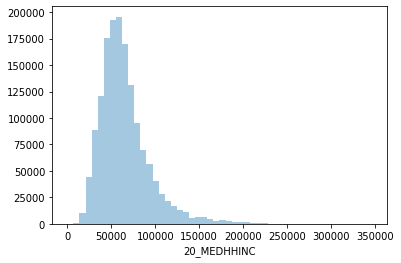

In [47]:
sns.distplot( a=df["20_MEDHHINC"], hist=True, kde=False, rug=False )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


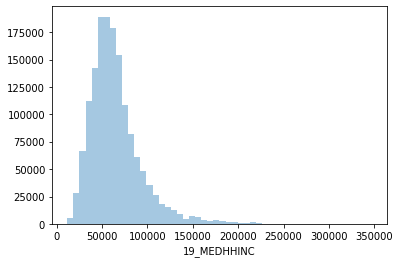

In [48]:
sns.distplot( a=df["19_MEDHHINC"], hist=True, kde=False, rug=False )
plt.show()

# Modeling

In [198]:
# Import Libraries - why are all these needed here? 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Drop Columns to keep data type consistant 
df.drop(['ZIP_CODE', 'ZIP4', 'FULL_ZIP'], axis=1, inplace=True);
#df.drop(['FULL_ZIP'], axis=1, inplace=True);

In [200]:
# Create sample of data. Sampling with percentage because the dataset is too large. Set random state to achieve same results each time.
from pandas.core.common import random_state

subset_data_percentage = df.sample(frac=0.01, random_state=7)
subset_data_percentage

,20_POP20,20_HH20,20_POPGROW20,20_AVGHHSIZE,20_MEDAGHHER,20_MEDRENT,20_MEDVALOCC,20_MEDVEHICLE,20_MEDHHINC,20_AVGHHINC,...,19_PCTWNHPOP,19_PCTGRADDEG,19_PCTWHCOL,19_PCTSPARC,19_CASH_EDU,19_HEALTHINS,19_MEDHHINC,19_MEDAGHHER,MEDHHINC_DIFF_RAW,MEDHHINC_DIFF_PCT
45585,8.2,3.1,11.77,2.64,44.9,572,78509,2.0,22381,25630,...,3.21,2.02,9.88,27.89,4.2,2043.5,21913,44.4,468,0.021357
1445534,2.6,1.1,7.72,2.31,60.7,615,94044,2.3,47183,52236,...,94.75,4.06,25.49,6.90,29.4,3731.4,46794,60.1,389,0.008313
274401,2.9,1.1,27.20,2.56,50.1,667,147649,2.5,82707,89496,...,87.51,11.07,28.86,9.59,42.4,3783.5,82328,49.0,379,0.004604
210201,13.7,4.8,12.10,2.87,52.0,955,335059,2.7,134550,136127,...,81.50,17.88,50.08,6.78,78.0,4129.1,133809,51.5,741,0.005538
1475280,4.6,1.9,5.57,2.46,56.9,373,116190,2.5,48145,59795,...,93.14,5.41,26.08,9.34,32.5,3578.9,47530,55.6,615,0.012939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152552,1.5,0.6,20.79,2.50,57.1,471,143151,2.4,68942,80651,...,65.48,3.64,22.78,13.19,31.3,3518.8,68819,56.2,123,0.001787
1039868,5.2,2.2,-2.82,2.34,52.9,243,55554,1.8,27511,33852,...,20.82,1.95,10.73,24.54,8.1,2361.1,27642,52.3,-131,-0.004739
202444,2.5,1.0,18.80,2.50,53.8,259,152233,2.8,61503,67560,...,81.22,19.17,25.32,8.52,31.0,3672.3,61059,53.3,444,0.007272
332063,7.1,2.4,28.33,2.93,48.8,844,214481,2.5,116648,119973,...,81.78,7.56,45.00,7.89,61.8,3976.8,115609,47.8,1039,0.008987


In [201]:
# Define Variables to use for all modeling
X = subset_data_percentage[['19_POPGROW19', '19_MEDAGE', '19_PCTWNHPOP', 
        '19_PCTGRADDEG', '19_PCTWHCOL', '19_PCTSPARC', '19_MEDAGHHER']]
Y = subset_data_percentage['MEDHHINC_DIFF_PCT']

In [202]:
# Split data into 70% training, 30% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# OLS Linear Regression

In [221]:
#Define the regression model
model = linear_model.LinearRegression()

In [222]:
#Build Linear Regression
#Build training model
model.fit(X_train, Y_train)

LinearRegression()

In [223]:
#Creating function to get model statistics, use same X,Y as previous model (be careful of things that are counts)
#R-squared .051 = 5% of the DV's varaibles are explained by the variables
import statsmodels.api as sm
def get_stats():
    results = sm.OLS(Y, X.astype(float)).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:      MEDHHINC_DIFF_PCT   R-squared (uncentered):                   0.028
Model:                            OLS   Adj. R-squared (uncentered):              0.028
Method:                 Least Squares   F-statistic:                              63.03
Date:                Thu, 16 Jun 2022   Prob (F-statistic):                    7.45e-90
Time:                        18:08:23   Log-Likelihood:                          27428.
No. Observations:               15229   AIC:                                 -5.484e+04
Df Residuals:                   15222   BIC:                                 -5.479e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [224]:
#Apply trained model to make prediction (on test set) #REMOVE?
Y_pred = model.predict(X_test)

In [225]:
#Print Model Performance - Mean Squared Error (MSE) #REMOVE?
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [ 0.00018453  0.00020096  0.00003601  0.00008611 -0.00015045  0.00058705
 -0.00023262]
Intercept: 0.0027328412641383915
Mean squared error (MSE): 0.00
Coefficient of determination (R^2): -0.00


# KNN - Non-Linear Model

In [226]:
# KNN on MEDHHINC_DIFF_PCT (Dependent variable)
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [227]:
# Setup for elbow curve
rmse_val = [] # To store rmse values for different k
for K in range(40):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Y_train)
    pred=model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.06426284402131285
RMSE value for k=  2 is: 0.04976455813922591
RMSE value for k=  3 is: 0.04577354026654944
RMSE value for k=  4 is: 0.04399034675766018
RMSE value for k=  5 is: 0.042949351416438526
RMSE value for k=  6 is: 0.04302829085639467
RMSE value for k=  7 is: 0.042489032801591414
RMSE value for k=  8 is: 0.04301871130309121
RMSE value for k=  9 is: 0.042361526205467376
RMSE value for k=  10 is: 0.04194506877795976
RMSE value for k=  11 is: 0.041599908642404766
RMSE value for k=  12 is: 0.04163006890795909
RMSE value for k=  13 is: 0.04137773422705606
RMSE value for k=  14 is: 0.04119485452851239
RMSE value for k=  15 is: 0.04118412429416245
RMSE value for k=  16 is: 0.04111858453709126
RMSE value for k=  17 is: 0.041068421022817485
RMSE value for k=  18 is: 0.0411920418928722
RMSE value for k=  19 is: 0.04108394290224515
RMSE value for k=  20 is: 0.04099331284154372
RMSE value for k=  21 is: 0.04095780119336287
RMSE value for k=  22 is: 0.04087161653

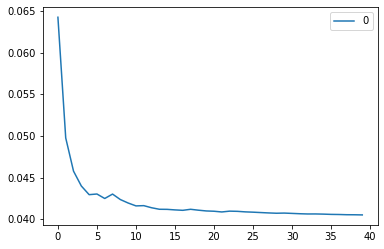

In [228]:
# Plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) # elbow curve 
curve.plot()

In [229]:
# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=29)

In [230]:
# Fit KNN model
knn_model.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=29)

In [231]:
# Predict w/ accuracy 1-.03633 = .9637 (predict w/ 96.4% accuracy)
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(Y_train, train_preds)
rmse_Train = sqrt(mse)
rmse_Train

0.03901139884381374

In [232]:
# Predict w/ accuracy 1-.0381 = .962 (predict w/ 96.2% accuracy)
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(Y_test, test_preds)
rmse_Test = sqrt(mse)
rmse_Test

0.040717802249729804

# Stepwise Regression

In [242]:
#Tutorial for forward and backward are here https://www.datasklr.com/ols-least-squares-regression/variable-selection (not the code used below)
#Video explaination of how Stepwise works https://www.youtube.com/watch?v=AdFT17sq53s
import statsmodels.api as sm

def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 

    return best_features

In [234]:
# Stepwise on 'MEDHHINC_DIFF_PCT'. Output is the independent variables that are significant. (% Single Parents with Children, %Pop Growth, %White Collar Employment)
stepwise_selection(X_train,Y_train)

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


['19_PCTSPARC', '19_POPGROW19', '19_PCTWHCOL']

In [235]:
#Calculate the predicted Y values against the initial Y
#https://stackoverflow.com/questions/64129049/get-beta-coefficients-of-regression-model-in-python
np.polyfit(Y_test,Y_pred,1)[0]

0.0034767489193903377

In [236]:
#Display the coef https://medium.com/@garrettwilliams90/stepwise-feature-selection-for-statsmodels-fda269442556
regressor = LinearRegression(fit_intercept=False)
regressor.fit(X, Y)
regressor.coef_ 

array([ 0.00019576,  0.00022962,  0.00003274,  0.00006029, -0.00009452,
        0.00055042, -0.00021755])

# XGBoost


In [237]:
# Import XGBoost library https://www.datacamp.com/tutorial/xgboost-in-python
import xgboost as xgb

In [238]:
# Convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains
data_dmatrix = xgb.DMatrix(data=X,label=Y)

In [239]:
# Calling XGRegressor()
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [240]:
# Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods
xg_reg.fit(X_train,Y_train)
preds = xg_reg.predict(X_test)

[18:10:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [241]:
# Compute the rmse by invoking the mean_sqaured_error function from sklearn's metrics module. Error rate = .037871 (4%)
rmse = np.sqrt(mean_squared_error(Y_test, pred))
print("RMSE: %f" % (rmse))

RMSE: 0.040516


# k-fold Cross Validation Using XGBoost

In [118]:
#Use these parameters to build a 3-fold cross validation model by invoking XGBoost's cv() method and store the results in a cv_results DataFrame
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[13:25:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [119]:
#cv_results contains train and test RMSE metrics for each boosting round
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.446264,0.000357,0.446264,0.000710
1,0.402071,0.000405,0.402071,0.000789
2,0.362334,0.000461,0.362333,0.000879
3,0.326609,0.000524,0.326609,0.000980
4,0.294502,0.000595,0.294501,0.001095


In [120]:
#Extract and print the final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

49    0.035472
Name: test-rmse-mean, dtype: float64


# Random Forest

In [189]:
#Modeling Random Forest (https://www.google.com/search?q=doing+SHAP+in+google+colab&rlz=1C1UEAD_enUS960US967&biw=1536&bih=714&ei=aAOqYuyhFYapptQPrqWP2AQ&ved=0ahUKEwjs9fuT66_4AhWGlIkEHa7SA0sQ4dUDCA4&uact=5&oq=doing+SHAP+in+google+colab&gs_lcp=Cgdnd3Mtd2l6EAM6BwgAEEcQsANKBAhBGABKBAhGGABQnwJYnwJg5ARoAXABeACAAViIAViSAQExmAEAoAEByAEEwAEB&sclient=gws-wiz#kpvalbx=_YwOqYt6QJpunptQPz6GLmAw16)
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators= 20,
                              random_state = 1502)
rf_model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=20, random_state=1502)

# SHAP Local Interpretability

In [197]:
import shap
explainer = shap.KernelExplainer(knn_model.predict, X_test)

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
Using 4569 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [194]:
X_test.head()

,19_POPGROW19,19_MEDAGE,19_PCTWNHPOP,19_PCTGRADDEG,19_PCTWHCOL,19_PCTSPARC,19_MEDAGHHER
374329,18.86,36.3,51.75,6.08,33.08,14.07,49.2
994689,10.33,42.9,55.82,2.85,34.85,18.00,51.5
956936,17.25,32.6,39.80,14.30,52.78,8.03,42.2
1428196,4.82,43.6,95.31,7.44,22.82,10.71,52.9
1058764,-4.82,31.1,33.75,1.23,15.77,25.28,49.4


In [184]:
#Local interpretability
instance = X_test.loc[[994689]] #Select an index number from the dataframe head displayed above
shap_instance = explainer.shap_values(instance)
shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_instance,
                instance)

  0%|          | 0/1 [00:00<?, ?it/s]

X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [123]:
# #Training the model
# from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier
# tree_class = DecisionTreeClassifier(ccp_alpha=0.01, class_weight=None, criterion='entropy',
# max_depth=9, max_features='auto', max_leaf_nodes=None,
# min_impurity_decrease=0.0, min_impurity_split=None,
# min_samples_leaf=1, min_samples_split=2,
# min_weight_fraction_leaf=0.0, presort='deprecated',
# random_state=1024, splitter='best')
# tree_clas.fit(X_train, Y_train)
# Y_predict = tree_clas.predict(X_test)

TypeError: ignored

In [146]:
#Local interpretability - 
#19_PCTWNHPOP is contributing postively & 19_PCTSPARC, 19_PCTWHCOL, and 19_POPGROW19 is contributing negatively 
instance = X_test.loc[[606365]]
shap_instance = explainer.shap_values(instance)
shap.initjs() #creates graph
shap.force_plot(explainer.expected_value,
                shap_instance,
                instance)

KeyError: ignored